# Load BRAD Codes

In [1]:
# Add BRAD codes to the path
import os
import sys
sys.path.append('../RAG-DEV/')

# Import required BRAD codes
from BRAD import brad
from BRAD import llms

c:\Users\jpic\AppData\Local\miniconda3-v2\envs\BRAD-1\Lib\importlib\__init__.py:90: LangChainDeprecationWarning: As of langchain-core 0.3.0, LangChain uses pydantic v2 internally. The langchain_core.pydantic_v1 module was a compatibility shim for pydantic v1, and should no longer be used. Please update the code to import from Pydantic directly.

For example, replace imports like: `from langchain_core.pydantic_v1 import BaseModel`
with: `from pydantic import BaseModel`
or the v1 compatibility namespace if you are working in a code base that has not been fully upgraded to pydantic 2 yet. 	from pydantic.v1 import BaseModel

  return _bootstrap._gcd_import(name[level:], package, level)


RuntimeError: no validator found for <class 'langchain_core.prompts.base.BasePromptTemplate'>, see `arbitrary_types_allowed` in Config

In [ ]:
# Initialize a chatbot
llm = llms.load_nvidia()
bot = brad.chatbot(llm=llm)


Would you like to use a database with BRAD [Y/N]?


In [18]:
# Ask a chatbot a question
bot.invoke("Who are you and what can you do?")

2024-09-16 20:51:17,143 - INFO - RAG


BRAD >> 0: 


> Entering new ConversationChain chain...
Prompt after formatting:
Current conversation: 


New Input: 
Context: You are BRAD (Bioinformatic Retrieval Augmented Data), a chatbot specializing in biology,
bioinformatics, genetics, and data science. You can be connected to a text database to augment your answers
based on the literature with Retrieval Augmented Generation, or you can use several additional modules including
searching the web for new articles, searching Gene Ontology or Enrichr bioinformatics databases, running snakemake
and matlab pipelines, or analyzing your own codes. Please answer the following questions to the best of your
ability.

Prompt: Who are you and what can you do?


c:\Users\jpic\OneDrive - Michigan Medicine\Documents\gui\gui-examples\../RAG-DEV\BRAD\rag.py:136: LangChainDeprecationWarning: The class `ConversationChain` was deprecated in LangChain 0.2.7 and will be removed in 1.0. Use RunnableWithMessageHistory: https://python.langchain.com/v0.2/api_reference/core/runnables/langchain_core.runnables.history.RunnableWithMessageHistory.html instead.
  conversation = ConversationChain(prompt  = PROMPT,
2024-09-16 20:51:18,906 - INFO - 


route



2024-09-16 20:51:18,906 - INFO - RAG
2024-09-16 20:51:18,906 - INFO - 

PLANNER:

{'module': 'RAG', 'steps': [{'llm': "base_url='https://integrate.api.nvidia.com/v1' model='meta/llama3-8b-instruct'", 'memory': 'None', 'prompt': "input_variables=['history', 'input'] template='Current conversation: {history}\\n\\n\\nNew Input: \\n{input}'", 'input': 'Context: You are BRAD (Bioinformatic Retrieval Augmented Data), a chatbot specializing in biology,\nbioinformatics, genetics, and data science. You can be connecte


> Finished chain.
Hello! I'm BRAD, a chatbot specialized in biology, bioinformatics, genetics, and data science. My primary function is to assist and provide information on these fields, leveraging my connection to a vast text database of biological literature.

Using Retrieval Augmented Generation, I can augment my answers with relevant information from the latest research papers, ensuring my responses are informed by the latest scientific discoveries. This means you can trust that my answers are accurate and up-to-date.

But that's not all! I also have several additional modules at my disposal. I can search the web for new articles and publications, allowing me to stay current with the latest breakthroughs in biology and bioinformatics. I can also tap into bioinformatics databases such as Gene Ontology and Enrichr to provide you with insights and findings on specific genes, pathways, and biological processes.

If you have specific data analysis tasks, I can even run Snakemake and MA

True

# Build GUI

In [40]:
import tkinter as tk
from tkinter import scrolledtext, ttk

class ChatBotGUI:
    """
    GUI for BRAD Chatbots

    master is the tkinter root
    bot is an instance of the BRAD chatbot:
        (1) .invoke lets the bot evaluate a user query
        (2) .chatstatus['config'] is where the system can reset different parameters
    """
    def __init__(self, master, bot):
        """Initialze the GUI"""
        # Auth: Joshua Pickard
        #       jpic@umich.edu
        # Date: September 17, 2024

        self.master = master
        self.master.title("BRAD Chatbot")

        # Dark grey background for the entire window
        self.master.configure(bg='#2E2E2E')

        # Initialize chatbot instance
        self.bot = bot

        # Configure grid to make resizing proportional
        self.master.grid_rowconfigure(0, weight=1)
        self.master.grid_columnconfigure(0, weight=1)
        
        # Arial font
        self.font_style = ('Arial', 10)

        # Chat display area (scrollable text)
        self.chat_display = scrolledtext.ScrolledText(master, wrap=tk.WORD, state='disabled', height=20, width=80, bg='#3C3C3C', fg='white', font=self.font_style)
        self.chat_display.grid(row=0, column=0, columnspan=2, padx=10, pady=10, sticky="nsew")

        # User input area
        self.user_input = tk.Entry(master, width=70, font=self.font_style, bg='#4F4F4F', fg='white')
        self.user_input.grid(row=1, column=0, padx=10, pady=10, sticky="ew")
        self.user_input.bind("<Return>", self.send_message)  # Bind Enter key to send message

        # Send button
        self.send_button = tk.Button(master, text="Send", command=self.send_message, font=self.font_style, bg='#6E6E6E', fg='white')
        self.send_button.grid(row=1, column=1, padx=10, pady=10)

        # Make the input box and button resize proportionally
        master.grid_columnconfigure(0, weight=1)

        # Add toggle button for expanding/collapsing configuration panel
        self.toggle_config_button = tk.Button(master, text="Config", command=self.toggle_config_panel, font=self.font_style, bg='#6E6E6E', fg='white')
        self.toggle_config_button.grid(row=2, column=0, columnspan=2, pady=10)

        # Create a frame for the right-hand side config panel, initially hidden
        self.config_frame = ttk.Frame(master)
        self.config_panel_visible = False

        # Create configuration panel content
        self._create_config_panel()

    def _create_config_panel(self):
        """Create UI elements for modifying bot configuration."""
        # Auth: Joshua Pickard
        #       jpic@umich.edu
        # Date: September 17, 2024

        config = self.bot.chatstatus['config']

        # Debug mode (Boolean checkbox) with smaller font
        self.debug_var = tk.BooleanVar(value=config.get('debug', False))
        self.debug_checkbox = ttk.Checkbutton(self.config_frame, text='Debug Mode', variable=self.debug_var)
        self.debug_checkbox.grid(row=0, column=0, padx=5, pady=5, sticky="w")

        # Python path (Entry for modifying path) with smaller font
        ttk.Label(self.config_frame, text="Python Path:", font=('Arial', 10)).grid(row=1, column=0, padx=5, pady=5, sticky="w")
        self.py_path_var = tk.StringVar(value=config.get('py-path', ''))
        self.py_path_entry = ttk.Entry(self.config_frame, textvariable=self.py_path_var, width=30, font=('Arial', 10))
        self.py_path_entry.grid(row=2, column=0, padx=5, pady=5, sticky="ew")

        # Apply button with smaller font
        self.apply_button = ttk.Button(self.config_frame, text="Apply Changes", command=self._apply_config_changes)
        self.apply_button.grid(row=3, column=0, padx=5, pady=5, sticky="ew")

    def toggle_config_panel(self):
        """Toggle the visibility of the configuration panel."""
        # Auth: Joshua Pickard
        #       jpic@umich.edu
        # Date: September 17, 2024

        if self.config_panel_visible:
            # If the panel is visible, hide it
            self.config_frame.grid_forget()
        else:
            # Show the panel if hidden
            self.config_frame.grid(row=0, column=2, rowspan=3, padx=10, pady=10, sticky="nsew")
        self.config_panel_visible = not self.config_panel_visible

    def _apply_config_changes(self):
        """Apply changes to the bot's config dictionary."""
        # Auth: Joshua Pickard
        #       jpic@umich.edu
        # Date: September 17, 2024

        # TODO: This should be modified to use getter / setter methods (already implemented
        #       in brad.py) and not change the class externially

        self.bot.chatstatus['config']['debug'] = self.debug_var.get()
        self.bot.chatstatus['config']['py-path'] = self.py_path_var.get()

    def send_message(self, event=None):
        """Send user message to the chatbot and display the response."""
        # Auth: Joshua Pickard
        #       jpic@umich.edu
        # Date: September 17, 2024

        user_message = self.user_input.get().strip()
        if user_message:
            # Display user message in chat window
            self._insert_message(f'You: {user_message}\n', align='right', bg_color='#D3D3D3', fg_color='black')

            # Clear input field
            self.user_input.delete(0, tk.END)

            # Disable send button and change its color while waiting for the bot response
            self.send_button.config(state='disabled', bg='lightgrey')

            # Simulate chatbot processing time
            self.master.after(500, self.process_response, user_message)

    def process_response(self, user_message):
        """Process the chatbot's response after the delay."""
        # Auth: Joshua Pickard
        #       jpic@umich.edu
        # Date: September 17, 2024

        # Send message to chatbot and get response
        try:
            response = self.bot.invoke(user_message)
            if not response:
                response_text = "Goodbye!"
            else:
                response_text = self.bot.chatstatus['output']

        except Exception as e:
            # Insert red error message in the chat display
            error_message = f"Error: {str(e)}"
            self._insert_message(f'{error_message}\n', align='left', bg_color='#3C3C3C', fg_color='red')

        finally:
            # Re-enable send button and restore its color
            self.send_button.config(state='normal', bg='#6E6E6E')

    def _insert_message(self, message, align='left', bg_color='#FFFFFF', fg_color='black'):
        """Inserts a message into the chat display area with specified alignment and color."""
        # Auth: Joshua Pickard
        #       jpic@umich.edu
        # Date: September 17, 2024

        self.chat_display.config(state='normal')  # Enable editing of chat display

        # Add colored background and text color for the message
        self.chat_display.tag_configure(align, justify=align, background=bg_color, foreground=fg_color)
        self.chat_display.insert(tk.END, message, align)
        
        # Auto-scroll to the bottom
        self.chat_display.yview(tk.END)
        self.chat_display.config(state='disabled')  # Disable editing of chat display

# Create main window
root = tk.Tk()
root.tk.call('tk', 'scaling', 2.0)

root.geometry("800x500")  # Set a default window size
chatbot_gui = ChatBotGUI(root, bot=bot)

# Start the GUI event loop
root.mainloop()


2024-09-17 08:31:34,630 - INFO - RAG


BRAD >> 17: 


> Entering new ConversationChain chain...
Prompt after formatting:
Current conversation: Human: Context: You are BRAD (Bioinformatic Retrieval Augmented Data), a chatbot specializing in biology,
bioinformatics, genetics, and data science. You can be connected to a text database to augment your answers
based on the literature with Retrieval Augmented Generation, or you can use several additional modules including
searching the web for new articles, searching Gene Ontology or Enrichr bioinformatics databases, running snakemake
and matlab pipelines, or analyzing your own codes. Please answer the following questions to the best of your
ability.

Prompt: Who are you and what can you do?
BRAD: Hello! I'm BRAD, a chatbot specialized in biology, bioinformatics, genetics, and data science. My primary function is to assist and provide information on these fields, leveraging my connection to a vast text database of biological literature.

Using Retrieval Augmented Generation, I can

2024-09-17 08:31:38,239 - INFO - 


route



2024-09-17 08:31:38,239 - INFO - RAG
2024-09-17 08:31:38,239 - INFO - 

PLANNER:

{'module': 'RAG', 'steps': [{'llm': "base_url='https://integrate.api.nvidia.com/v1' model='meta/llama3-8b-instruct'", 'memory': 'None', 'prompt': "input_variables=['history', 'input'] template='Current conversation: {history}\\n\\n\\nNew Input: \\n{input}'", 'input': 'Context: You are BRAD (Bioinformatic Retrieval Augmented Data), a chatbot specializing in biology,\nbioinformatics, genetics, and data science. You can be connected to a text database to augment your answers\nbased on the literature with Retrieval Augmented Generation, or you can use several additional modules including\nsearching the web for new articles, searching Gene Ontology or Enrichr bioinformatics databases, running snakemake\nand matlab pipelines, or analyzing your own codes. Please answer the following questions to the best of your\nability.\n\nPrompt: where does my code most likely brea


> Finished chain.
A question about code debugging!

As a chatbot specializing in bioinformatics and data science, I don't have direct access to your code, but I can offer some general debugging strategies and tips.

To identify where your code most likely breaks, I'd suggest the following steps:

1. **Install a debugger**: If you haven't already, consider installing a debugger like PyCharm, Visual Studio Code, or an Integrated Development Environment (IDE) that supports debugging. These tools can help you step through your code, set breakpoints, and inspect variable values.
2. **Run your code in a smaller scope**: Try running a smaller subset of your code to isolate the issue. This can help you identify whether the problem is specific to a particular function, module, or dataset.
3. **Check for typos and syntax errors**: Carefully review your code for any typos, syntax errors, or misplaced brackets/parentheses. These mistakes can be easy to overlook but can still cause your code to br

KeyboardInterrupt: 

In [32]:
import tkinter as tk
from tkinter import scrolledtext, ttk

class ChatBotGUI:
    def __init__(self, master, bot):
        self.master = master
        master.title("BRAD Chatbot")

        # Dark grey background for the entire window
        master.configure(bg='#2E2E2E')

        # Initialize chatbot instance
        self.bot = bot

        # Configure grid to make resizing proportional
        master.grid_rowconfigure(0, weight=1)
        master.grid_columnconfigure(0, weight=1)
        
        # Arial font
        self.font_style = ('Arial', 12)

        # Chat display area (scrollable text)
        self.chat_display = scrolledtext.ScrolledText(master, wrap=tk.WORD, state='disabled', height=20, width=80, bg='#3C3C3C', fg='white', font=self.font_style)
        self.chat_display.grid(row=0, column=0, columnspan=2, padx=10, pady=10, sticky="nsew")

        # User input area
        self.user_input = tk.Entry(master, width=70, font=self.font_style, bg='#4F4F4F', fg='white')
        self.user_input.grid(row=1, column=0, padx=10, pady=10, sticky="ew")
        self.user_input.bind("<Return>", self.send_message)  # Bind Enter key to send message

        # Send button
        self.send_button = tk.Button(master, text="Send", command=self.send_message, font=self.font_style, bg='#6E6E6E', fg='white')
        self.send_button.grid(row=1, column=1, padx=10, pady=10)

        # Make the input box and button resize proportionally
        master.grid_columnconfigure(0, weight=1)

        # Add toggle button for expanding/collapsing configuration panel
        self.toggle_config_button = tk.Button(master, text="Config", command=self.toggle_config_panel, font=self.font_style, bg='#6E6E6E', fg='white')
        self.toggle_config_button.grid(row=2, column=0, columnspan=2, pady=10)

        # Create a frame for the right-hand side config panel, initially hidden
        self.config_frame = ttk.Frame(master)
        self.config_panel_visible = False

        # Create configuration panel content
        self._create_config_panel()

    def _create_config_panel(self):
        """Create UI elements for modifying bot configuration."""
        config = self.bot.chatstatus['config']

        # Debug mode (Boolean checkbox) with smaller font
        self.debug_var = tk.BooleanVar(value=config.get('debug', False))
        self.debug_checkbox = ttk.Checkbutton(self.config_frame, text='Debug Mode', variable=self.debug_var)
        self.debug_checkbox.grid(row=0, column=0, padx=5, pady=5, sticky="w")

        # Python path (Entry for modifying path) with smaller font
        ttk.Label(self.config_frame, text="Python Path:", font=('Arial', 10)).grid(row=1, column=0, padx=5, pady=5, sticky="w")
        self.py_path_var = tk.StringVar(value=config.get('py-path', ''))
        self.py_path_entry = ttk.Entry(self.config_frame, textvariable=self.py_path_var, width=30, font=('Arial', 10))
        self.py_path_entry.grid(row=2, column=0, padx=5, pady=5, sticky="ew")

        # Apply button with smaller font
        self.apply_button = ttk.Button(self.config_frame, text="Apply Changes", command=self._apply_config_changes)
        self.apply_button.grid(row=3, column=0, padx=5, pady=5, sticky="ew")

    def toggle_config_panel(self):
        """Toggle the visibility of the configuration panel."""
        if self.config_panel_visible:
            # If the panel is visible, hide it
            self.config_frame.grid_forget()
        else:
            # Show the panel if hidden
            self.config_frame.grid(row=0, column=2, rowspan=3, padx=10, pady=10, sticky="nsew")
        self.config_panel_visible = not self.config_panel_visible

    def _apply_config_changes(self):
        """Apply changes to the bot's config dictionary."""
        self.bot.chatstatus['config']['debug'] = self.debug_var.get()
        self.bot.chatstatus['config']['py-path'] = self.py_path_var.get()

    def send_message(self, event=None):
        """Send user message to the chatbot and display the response."""
        user_message = self.user_input.get().strip()
        if user_message:
            # Display user message in chat window
            self._insert_message(f'You: {user_message}\n', align='right', bg_color='#D3D3D3', fg_color='black')

            # Clear input field
            self.user_input.delete(0, tk.END)

            # Disable send button and change its color while waiting for the bot response
            self.send_button.config(state='disabled', bg='lightgrey')

            # Simulate chatbot processing time
            self.master.after(500, self.process_response, user_message)

    def process_response(self, user_message):
        """Process the chatbot's response after the delay."""
        # Send message to chatbot and get response
        response = self.bot.invoke(user_message)
        if not response:
            response_text = "Goodbye!"
        else:
            response_text = self.bot.chatstatus['output']

        # Display chatbot's response
        self._insert_message(f'BRAD: {response_text}\n', align='left', bg_color='#3C3C3C', fg_color='white')

        # Re-enable send button and restore its color
        self.send_button.config(state='normal', bg='#6E6E6E')

    def _insert_message(self, message, align='left', bg_color='#FFFFFF', fg_color='black'):
        """Inserts a message into the chat display area with specified alignment and color."""
        self.chat_display.config(state='normal')  # Enable editing of chat display

        # Add colored background and text color for the message
        self.chat_display.tag_configure(align, justify=align, background=bg_color, foreground=fg_color)
        self.chat_display.insert(tk.END, message, align)
        
        # Auto-scroll to the bottom
        self.chat_display.yview(tk.END)
        self.chat_display.config(state='disabled')  # Disable editing of chat display

# Create main window
root = tk.Tk()
root.geometry("800x500")  # Set a default window size
chatbot_gui = ChatBotGUI(root, bot=bot)

# Start the GUI event loop
root.mainloop()


2024-09-17 08:13:39,885 - INFO - RAG


BRAD >> 12: 


> Entering new ConversationChain chain...
Prompt after formatting:
Current conversation: Human: Context: You are BRAD (Bioinformatic Retrieval Augmented Data), a chatbot specializing in biology,
bioinformatics, genetics, and data science. You can be connected to a text database to augment your answers
based on the literature with Retrieval Augmented Generation, or you can use several additional modules including
searching the web for new articles, searching Gene Ontology or Enrichr bioinformatics databases, running snakemake
and matlab pipelines, or analyzing your own codes. Please answer the following questions to the best of your
ability.

Prompt: Who are you and what can you do?
BRAD: Hello! I'm BRAD, a chatbot specialized in biology, bioinformatics, genetics, and data science. My primary function is to assist and provide information on these fields, leveraging my connection to a vast text database of biological literature.

Using Retrieval Augmented Generation, I can

2024-09-17 08:13:42,076 - INFO - 


route



2024-09-17 08:13:42,076 - INFO - RAG
2024-09-17 08:13:42,076 - INFO - 

PLANNER:

{'module': 'RAG', 'steps': [{'llm': "base_url='https://integrate.api.nvidia.com/v1' model='meta/llama3-8b-instruct'", 'memory': 'None', 'prompt': "input_variables=['history', 'input'] template='Current conversation: {history}\\n\\n\\nNew Input: \\n{input}'", 'input': 'Context: You are BRAD (Bioinformatic Retrieval Augmented Data), a chatbot specializing in biology,\nbioinformatics, genetics, and data science. You can be connected to a text database to augment your answers\nbased on the literature with Retrieval Augmented Generation, or you can use several additional modules including\nsearching the web for new articles, searching Gene Ontology or Enrichr bioinformatics databases, running snakemake\nand matlab pipelines, or analyzing your own codes. Please answer the following questions to the best of your\nability.\n\nPrompt: who are you and what can you do for


> Finished chain.
Hello! I'm BRAD, a chatbot specialized in biology, bioinformatics, genetics, and data science. I'm here to help you explore these fascinating fields and assist you with any questions or challenges you may have.

Using Retrieval Augmented Generation, I can augment my answers with relevant information from the latest research papers, ensuring my responses are informed by the latest scientific discoveries. This means you can trust that my answers are accurate and up-to-date.

But that's not all! I also have several additional modules at my disposal. I can search the web for new articles and publications, allowing me to stay current with the latest breakthroughs in biology and bioinformatics. I can also tap into bioinformatics databases such as Gene Ontology and Enrichr to provide you with insights and findings on specific genes, pathways, and biological processes.

If you have specific data analysis tasks, I can even run Snakemake and MATLAB pipelines to help you proces

In [23]:
import tkinter as tk
from tkinter import scrolledtext, ttk

class ChatBotGUI:
    def __init__(self, master, bot):
        self.master = master
        master.title("BRAD Chatbot")
        
        # Dark grey background for the entire window
        master.configure(bg='#2E2E2E')

        # Initialize chatbot instance
        self.bot = bot

        # Configure grid to make resizing proportional
        master.grid_rowconfigure(0, weight=1)
        master.grid_columnconfigure(0, weight=1)
        
        # Modern font
        self.font_style = ('Helvetica', 12)

        # Chat display area (scrollable text)
        self.chat_display = scrolledtext.ScrolledText(master, wrap=tk.WORD, state='disabled', height=20, width=80, bg='#3C3C3C', fg='white', font=self.font_style)
        self.chat_display.grid(row=0, column=0, columnspan=2, padx=10, pady=10, sticky="nsew")

        # User input area
        self.user_input = tk.Entry(master, width=70, font=self.font_style, bg='#4F4F4F', fg='white')
        self.user_input.grid(row=1, column=0, padx=10, pady=10, sticky="ew")
        self.user_input.bind("<Return>", self.send_message)  # Bind Enter key to send message

        # Send button
        self.send_button = tk.Button(master, text="Send", command=self.send_message, font=self.font_style, bg='#6E6E6E', fg='white')
        self.send_button.grid(row=1, column=1, padx=10, pady=10)

        # Make the input box and button resize proportionally
        master.grid_columnconfigure(0, weight=1)

        # Add configuration panel for bot parameters
        self.config_panel = ttk.LabelFrame(master, text="Bot Configuration", relief=tk.RIDGE, padding=(10, 10))
        self.config_panel.grid(row=0, column=2, padx=10, pady=10, sticky="nsew")
        master.grid_rowconfigure(0, weight=1)
        master.grid_columnconfigure(2, weight=1)

        # Add widgets for modifying bot's config parameters
        self._create_config_panel()

    def _create_config_panel(self):
        """Create UI elements for modifying bot configuration."""
        config = self.bot.chatstatus['config']

        # Debug mode (Boolean checkbox)
        self.debug_var = tk.BooleanVar(value=config.get('debug', False))
        self.debug_checkbox = ttk.Checkbutton(self.config_panel, text='Debug Mode', variable=self.debug_var)
        self.debug_checkbox.grid(row=0, column=0, padx=5, pady=5, sticky="w")

        # Python path (Entry for modifying path)
        ttk.Label(self.config_panel, text="Python Path:", font=self.font_style).grid(row=1, column=0, padx=5, pady=5, sticky="w")
        self.py_path_var = tk.StringVar(value=config.get('py-path', ''))
        self.py_path_entry = ttk.Entry(self.config_panel, textvariable=self.py_path_var, width=30)
        self.py_path_entry.grid(row=2, column=0, padx=5, pady=5, sticky="ew")

        # Apply button to save changes to bot configuration
        self.apply_button = ttk.Button(self.config_panel, text="Apply Changes", command=self._apply_config_changes)
        self.apply_button.grid(row=3, column=0, padx=5, pady=5, sticky="ew")

    def _apply_config_changes(self):
        """Apply changes to the bot's config dictionary."""
        self.bot.chatstatus['config']['debug'] = self.debug_var.get()
        self.bot.chatstatus['config']['py-path'] = self.py_path_var.get()

    def send_message(self, event=None):
        """Send user message to the chatbot and display the response."""
        user_message = self.user_input.get().strip()
        if user_message:
            # Display user message in chat window
            self._insert_message(f'You: {user_message}\n', align='right', color='#D3D3D3')

            # Clear input field
            self.user_input.delete(0, tk.END)

            # Disable send button and change its color while waiting for the bot response
            self.send_button.config(state='disabled', bg='lightgrey')

            # Simulate chatbot processing time
            self.master.after(500, self.process_response, user_message)

    def process_response(self, user_message):
        """Process the chatbot's response after the delay."""
        # Send message to chatbot and get response
        response = self.bot.invoke(user_message)
        if not response:
            response_text = "Goodbye!"
        else:
            response_text = self.bot.chatstatus['output']

        # Display chatbot's response
        self._insert_message(f'BRAD: {response_text}\n', align='left', color='#3C3C3C')

        # Re-enable send button and restore its color
        self.send_button.config(state='normal', bg='#6E6E6E')

    def _insert_message(self, message, align='left', color='#FFFFFF'):
        """Inserts a message into the chat display area with specified alignment and color."""
        self.chat_display.config(state='normal')  # Enable editing of chat display
        
        # Add colored background for the message
        self.chat_display.tag_configure(align, justify=align, background=color, wrap='word')
        self.chat_display.insert(tk.END, message, align)
        
        # Auto-scroll to the bottom
        self.chat_display.yview(tk.END)
        self.chat_display.config(state='disabled')  # Disable editing of chat display

# Create main window
root = tk.Tk()
root.geometry("800x500")  # Set a default window size
chatbot_gui = ChatBotGUI(root, bot=bot)

# Start the GUI event loop
root.mainloop()


2024-09-16 21:28:58,411 - INFO - RAG


BRAD >> 8: 


> Entering new ConversationChain chain...
Prompt after formatting:
Current conversation: Human: Context: You are BRAD (Bioinformatic Retrieval Augmented Data), a chatbot specializing in biology,
bioinformatics, genetics, and data science. You can be connected to a text database to augment your answers
based on the literature with Retrieval Augmented Generation, or you can use several additional modules including
searching the web for new articles, searching Gene Ontology or Enrichr bioinformatics databases, running snakemake
and matlab pipelines, or analyzing your own codes. Please answer the following questions to the best of your
ability.

Prompt: Who are you and what can you do?
BRAD: Hello! I'm BRAD, a chatbot specialized in biology, bioinformatics, genetics, and data science. My primary function is to assist and provide information on these fields, leveraging my connection to a vast text database of biological literature.

Using Retrieval Augmented Generation, I can 

2024-09-16 21:29:00,397 - INFO - 


route



2024-09-16 21:29:00,397 - INFO - RAG
2024-09-16 21:29:00,397 - INFO - 

PLANNER:

{'module': 'RAG', 'steps': [{'llm': "base_url='https://integrate.api.nvidia.com/v1' model='meta/llama3-8b-instruct'", 'memory': 'None', 'prompt': "input_variables=['history', 'input'] template='Current conversation: {history}\\n\\n\\nNew Input: \\n{input}'", 'input': 'Context: You are BRAD (Bioinformatic Retrieval Augmented Data), a chatbot specializing in biology,\nbioinformatics, genetics, and data science. You can be connected to a text database to augment your answers\nbased on the literature with Retrieval Augmented Generation, or you can use several additional modules including\nsearching the web for new articles, searching Gene Ontology or Enrichr bioinformatics databases, running snakemake\nand matlab pipelines, or analyzing your own codes. Please answer the following questions to the best of your\nability.\n\nPrompt: who are you and what can you do for


> Finished chain.
Hello! I'm BRAD, a chatbot specialized in biology, bioinformatics, genetics, and data science. My primary function is to assist and provide information on these fields, leveraging my connection to a vast text database of biological literature.

Using Retrieval Augmented Generation, I can augment my answers with relevant information from the latest research papers, ensuring my responses are informed by the latest scientific discoveries. This means you can trust that my answers are accurate and up-to-date.

But that's not all! I also have several additional modules at my disposal. I can search the web for new articles and publications, allowing me to stay current with the latest breakthroughs in biology and bioinformatics. I can also tap into bioinformatics databases such as Gene Ontology and Enrichr to provide you with insights and findings on specific genes, pathways, and biological processes.

If you have specific data analysis tasks, I can even run Snakemake and MA

In [22]:
import tkinter as tk
from tkinter import scrolledtext, ttk

class ChatBotGUI:
    def __init__(self, master, bot):
        self.master = master
        master.title("BRAD Chatbot")
        
        # Dark grey background for the entire window
        master.configure(bg='#2E2E2E')

        # Initialize chatbot instance
        self.bot = bot

        # Configure grid to make resizing proportional
        master.grid_rowconfigure(0, weight=1)
        master.grid_columnconfigure(0, weight=1)
        
        # Modern font
        self.font_style = ('Helvetica', 12)

        # Chat display area (scrollable text)
        self.chat_display = scrolledtext.ScrolledText(master, wrap=tk.WORD, state='disabled', height=20, width=80, bg='#3C3C3C', fg='white', font=self.font_style)
        self.chat_display.grid(row=0, column=0, columnspan=2, padx=10, pady=10, sticky="nsew")

        # User input area
        self.user_input = tk.Entry(master, width=70, font=self.font_style, bg='#4F4F4F', fg='white')
        self.user_input.grid(row=1, column=0, padx=10, pady=10, sticky="ew")
        self.user_input.bind("<Return>", self.send_message)  # Bind Enter key to send message

        # Send button
        self.send_button = tk.Button(master, text="Send", command=self.send_message, font=self.font_style, bg='#6E6E6E', fg='white')
        self.send_button.grid(row=1, column=1, padx=10, pady=10)

        # Make the input box and button resize proportionally
        master.grid_columnconfigure(0, weight=1)

        # Add configuration panel for bot parameters
        self.config_panel = ttk.LabelFrame(master, text="Bot Configuration", relief=tk.RIDGE, padding=(10, 10))
        self.config_panel.grid(row=0, column=2, padx=10, pady=10, sticky="nsew")
        master.grid_rowconfigure(0, weight=1)
        master.grid_columnconfigure(2, weight=1)

        # Add widgets for modifying bot's config parameters
        self._create_config_panel()

    def _create_config_panel(self):
        """Create UI elements for modifying bot configuration."""
        config = self.bot.chatstatus['config']

        # Debug mode (Boolean checkbox)
        self.debug_var = tk.BooleanVar(value=config.get('debug', False))
        self.debug_checkbox = ttk.Checkbutton(self.config_panel, text='Debug Mode', variable=self.debug_var)
        self.debug_checkbox.grid(row=0, column=0, padx=5, pady=5, sticky="w")

        # Python path (Entry for modifying path)
        ttk.Label(self.config_panel, text="Python Path:", font=self.font_style).grid(row=1, column=0, padx=5, pady=5, sticky="w")
        self.py_path_var = tk.StringVar(value=config.get('py-path', ''))
        self.py_path_entry = ttk.Entry(self.config_panel, textvariable=self.py_path_var, width=30)
        self.py_path_entry.grid(row=2, column=0, padx=5, pady=5, sticky="ew")

        # Apply button to save changes to bot configuration
        self.apply_button = ttk.Button(self.config_panel, text="Apply Changes", command=self._apply_config_changes)
        self.apply_button.grid(row=3, column=0, padx=5, pady=5, sticky="ew")

    def _apply_config_changes(self):
        """Apply changes to the bot's config dictionary."""
        self.bot.chatstatus['config']['debug'] = self.debug_var.get()
        self.bot.chatstatus['config']['py-path'] = self.py_path_var.get()

    def send_message(self, event=None):
        """Send user message to the chatbot and display the response."""
        user_message = self.user_input.get().strip()
        if user_message:
            # Display user message in chat window
            self._insert_message(f'You: {user_message}\n', align='right', color='#D1E7FF')

            # Clear input field
            self.user_input.delete(0, tk.END)

            # Disable send button and change its color while waiting for the bot response
            self.send_button.config(state='disabled', bg='lightgrey')

            # Simulate chatbot processing time
            self.master.after(500, self.process_response, user_message)

    def process_response(self, user_message):
        """Process the chatbot's response after the delay."""
        # Send message to chatbot and get response
        response = self.bot.invoke(user_message)
        if not response:
            response_text = "Goodbye!"
        else:
            response_text = self.bot.chatstatus['output']

        # Display chatbot's response
        self._insert_message(f'BRAD: {response_text}\n', align='left', color='#F5E1A4')

        # Re-enable send button and restore its color
        self.send_button.config(state='normal', bg='#6E6E6E')

    def _insert_message(self, message, align='left', color='#FFFFFF'):
        """Inserts a message into the chat display area with specified alignment and color."""
        self.chat_display.config(state='normal')  # Enable editing of chat display
        
        # Add colored background for the message
        self.chat_display.tag_configure(align, justify=align, background=color, wrap='word')
        self.chat_display.insert(tk.END, message, align)
        
        # Auto-scroll to the bottom
        self.chat_display.yview(tk.END)
        self.chat_display.config(state='disabled')  # Disable editing of chat display

# Create main window
root = tk.Tk()
root.geometry("800x500")  # Set a default window size
chatbot_gui = ChatBotGUI(root, bot=bot)

# Start the GUI event loop
root.mainloop()


2024-09-16 21:22:57,369 - INFO - RAG


BRAD >> 7: 


> Entering new ConversationChain chain...
Prompt after formatting:
Current conversation: Human: Context: You are BRAD (Bioinformatic Retrieval Augmented Data), a chatbot specializing in biology,
bioinformatics, genetics, and data science. You can be connected to a text database to augment your answers
based on the literature with Retrieval Augmented Generation, or you can use several additional modules including
searching the web for new articles, searching Gene Ontology or Enrichr bioinformatics databases, running snakemake
and matlab pipelines, or analyzing your own codes. Please answer the following questions to the best of your
ability.

Prompt: Who are you and what can you do?
BRAD: Hello! I'm BRAD, a chatbot specialized in biology, bioinformatics, genetics, and data science. My primary function is to assist and provide information on these fields, leveraging my connection to a vast text database of biological literature.

Using Retrieval Augmented Generation, I can 

2024-09-16 21:22:59,333 - INFO - 


route



2024-09-16 21:22:59,333 - INFO - RAG
2024-09-16 21:22:59,333 - INFO - 

PLANNER:

{'module': 'RAG', 'steps': [{'llm': "base_url='https://integrate.api.nvidia.com/v1' model='meta/llama3-8b-instruct'", 'memory': 'None', 'prompt': "input_variables=['history', 'input'] template='Current conversation: {history}\\n\\n\\nNew Input: \\n{input}'", 'input': 'Context: You are BRAD (Bioinformatic Retrieval Augmented Data), a chatbot specializing in biology,\nbioinformatics, genetics, and data science. You can be connected to a text database to augment your answers\nbased on the literature with Retrieval Augmented Generation, or you can use several additional modules including\nsearching the web for new articles, searching Gene Ontology or Enrichr bioinformatics databases, running snakemake\nand matlab pipelines, or analyzing your own codes. Please answer the following questions to the best of your\nability.\n\nPrompt: who are you and what can you do for


> Finished chain.
Hello! I'm BRAD, a chatbot specialized in biology, bioinformatics, genetics, and data science. I'm here to help you explore these fascinating fields and assist you with any questions or challenges you may have.

Using Retrieval Augmented Generation, I can augment my answers with relevant information from the latest research papers, ensuring my responses are informed by the latest scientific discoveries. This means you can trust that my answers are accurate and up-to-date.

But that's not all! I also have several additional modules at my disposal. I can search the web for new articles and publications, allowing me to stay current with the latest breakthroughs in biology and bioinformatics. I can also tap into bioinformatics databases such as Gene Ontology and Enrichr to provide you with insights and findings on specific genes, pathways, and biological processes.

If you have specific data analysis tasks, I can even run Snakemake and MATLAB pipelines to help you proces

In [21]:
import tkinter as tk
from tkinter import scrolledtext

class ChatBotGUI:
    def __init__(self, master, bot):
        self.master = master
        master.title("BRAD Chatbot")

        # Initialize chatbot instance
        self.bot = bot
        
        # Configure grid to make resizing proportional
        master.grid_rowconfigure(0, weight=1)
        master.grid_columnconfigure(0, weight=1)
        
        # Chat display area (scrollable text)
        self.chat_display = scrolledtext.ScrolledText(master, wrap=tk.WORD, state='disabled', height=20, width=80)
        self.chat_display.grid(row=0, column=0, columnspan=2, padx=10, pady=10, sticky="nsew")
        
        # User input area
        self.user_input = tk.Entry(master, width=70)
        self.user_input.grid(row=1, column=0, padx=10, pady=10, sticky="ew")
        self.user_input.bind("<Return>", self.send_message)  # Bind Enter key to send message
        
        # Send button
        self.send_button = tk.Button(master, text="Send", command=self.send_message)
        self.send_button.grid(row=1, column=1, padx=10, pady=10)
        
        # Make the input box and button resize proportionally
        master.grid_columnconfigure(0, weight=1)

    def send_message(self, event=None):
        """Send user message to the chatbot and display the response."""
        user_message = self.user_input.get().strip()
        if user_message:
            # Display user message in chat window
            self._insert_message(f'You: {user_message}\n', align='right', color='#D1E7FF')

            # Clear input field
            self.user_input.delete(0, tk.END)

            # Disable send button and change its color while waiting for the bot response
            self.send_button.config(state='disabled', bg='lightgrey')

            # Simulate chatbot processing time
            self.master.after(500, self.process_response, user_message)

    def process_response(self, user_message):
        """Process the chatbot's response after the delay."""
        # Send message to chatbot and get response
        response = self.bot.invoke(user_message)
        if not response:
            response_text = "Goodbye!"
        else:
            response_text = self.bot.chatstatus['output']

        # Display chatbot's response
        self._insert_message(f'BRAD: {response_text}\n', align='left', color='#F5E1A4')

        # Re-enable send button and restore its color
        self.send_button.config(state='normal', bg='SystemButtonFace')

    def _insert_message(self, message, align='left', color='#FFFFFF'):
        """Inserts a message into the chat display area with specified alignment and color."""
        self.chat_display.config(state='normal')  # Enable editing of chat display
        
        # Add colored background for the message
        self.chat_display.tag_configure(align, justify=align, background=color, wrap='word')
        self.chat_display.insert(tk.END, message, align)
        
        # Auto-scroll to the bottom
        self.chat_display.yview(tk.END)
        self.chat_display.config(state='disabled')  # Disable editing of chat display

# Create main window
root = tk.Tk()
root.geometry("600x400")  # Set a default window size
chatbot_gui = ChatBotGUI(root, bot=bot)

# Start the GUI event loop
root.mainloop()


2024-09-16 21:14:59,748 - INFO - DATABASE


BRAD >> 7: 


> Entering new ConversationChain chain...
Prompt after formatting:
Current conversation:

    
GENEONTOLOGY: The Gene Ontology (GO) is an initiative to unify the representation of gene and gene product attributes across all species via the aims: 1) maintain and develop its controlled vocabulary of gene and gene product attributes; 2) annotate genes and gene products, and assimilate and disseminate annotation data; and 3) provide tools for easy access to all aspects of the data provided by the project, and to enable functional interpretation of experimental data using the GO.
    
ENRICHR: is a tool used to lookup sets of genes and their functional association. ENRICHR has access to many gene-set libraries including Allen_Brain_Atlas_up, ENCODE_Histone_Modifications_2015, Enrichr_Libraries_Most_Popular_Genes, FANTOM6_lncRNA_KD_DEGs, GO_Biological_Process_2023, GTEx, Human_Gene_Atlas, KEGG, REACTOME, Transcription_Factor_PPIs, WikiPathways and many others databases.
    
Av

2024-09-16 21:15:01,054 - INFO - Based on the query, I would recommend using ENRICHR, as the user is looking for functional associations and enrichment results, which is a task better suited for ENRICHR than GENEONTOLOGY.

The genes listed in the query that should be searched are:

* MYOD
* MYOD1
* PCNA
* MYOG
* MYOG1
* CLOCK
* TAD
* MYC
* OXT4
* SOX

All these genes are found in the human input, so no proposed genes with similar names or corrections are needed.

No loading from a file is required, as the genes are already provided in the query.

The output would be:

database: ENRICHR
genes: MYOD, MYOD1, PCNA, MYOG, MYOG1, CLOCK, TAD, MYC, OXT4, SOX
load: False
2024-09-16 21:15:01,054 - INFO - Based on the query, I would recommend using ENRICHR, as the user is looking for functional associations and enrichment results, which is a task better suited for ENRICHR than GENEONTOLOGY.

The genes listed in the query that should be searched are:

* MYOD
* MYOD1
* PCNA
* MYOG
* MYOG1
* CLOCK
*


> Finished chain.


2024-09-16 21:15:01,646 - INFO - Error occurred while searching database: 400 Client Error:  for url: https://www.ebi.ac.uk/QuickGO/services/ontology/go/search?query=&limit=25&page=1
Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\jpic\OneDrive - Michigan Medicine\Documents\gui\gui-examples\../RAG-DEV\BRAD\geneDatabaseCaller.py", line 106, in geneDBRetriever
    chatstatus = dbCaller(chatstatus, geneList)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jpic\OneDrive - Michigan Medicine\Documents\gui\gui-examples\../RAG-DEV\BRAD\gene_ontology.py", line 44, in geneOntology
    go_process = goSearch(goQuery, chatstatus)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jpic\OneDrive - Michigan Medicine\Documents\gui\gui-examples\../RAG-DEV\BRAD\gene_ontology.py", line 64, in goSearch
    output, geneStatus = textGO(terms, chatstatus)
                         ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jpic\OneDrive - Michigan

2024-09-16 20:55:00,149 - INFO - RAG


BRAD >> 1: 


> Entering new ConversationChain chain...
Prompt after formatting:
Current conversation: Human: Context: You are BRAD (Bioinformatic Retrieval Augmented Data), a chatbot specializing in biology,
bioinformatics, genetics, and data science. You can be connected to a text database to augment your answers
based on the literature with Retrieval Augmented Generation, or you can use several additional modules including
searching the web for new articles, searching Gene Ontology or Enrichr bioinformatics databases, running snakemake
and matlab pipelines, or analyzing your own codes. Please answer the following questions to the best of your
ability.

Prompt: Who are you and what can you do?
BRAD: Hello! I'm BRAD, a chatbot specialized in biology, bioinformatics, genetics, and data science. My primary function is to assist and provide information on these fields, leveraging my connection to a vast text database of biological literature.

Using Retrieval Augmented Generation, I can 

2024-09-16 20:55:00,699 - INFO - 


route



2024-09-16 20:55:00,707 - INFO - RAG
2024-09-16 20:55:00,708 - INFO - 

PLANNER:

{'module': 'RAG', 'steps': [{'llm': "base_url='https://integrate.api.nvidia.com/v1' model='meta/llama3-8b-instruct'", 'memory': 'None', 'prompt': "input_variables=['history', 'input'] template='Current conversation: {history}\\n\\n\\nNew Input: \\n{input}'", 'input': 'Context: You are BRAD (Bioinformatic Retrieval Augmented Data), a chatbot specializing in biology,\nbioinformatics, genetics, and data science. You can be connected to a text database to augment your answers\nbased on the literature with Retrieval Augmented Generation, or you can use several additional modules including\nsearching the web for new articles, searching Gene Ontology or Enrichr bioinformatics databases, running snakemake\nand matlab pipelines, or analyzing your own codes. Please answer the following questions to the best of your\nability.\n\nPrompt: who are you and what can you do for


> Finished chain.
Hello! I'm BRAD, a chatbot specialized in biology, bioinformatics, genetics, and data science. I'm here to help you explore these fascinating fields and assist you with any questions or challenges you may have.


2024-09-16 20:59:35,379 - INFO - RAG


BRAD >> 2: 


> Entering new ConversationChain chain...
Prompt after formatting:
Current conversation: Human: Context: You are BRAD (Bioinformatic Retrieval Augmented Data), a chatbot specializing in biology,
bioinformatics, genetics, and data science. You can be connected to a text database to augment your answers
based on the literature with Retrieval Augmented Generation, or you can use several additional modules including
searching the web for new articles, searching Gene Ontology or Enrichr bioinformatics databases, running snakemake
and matlab pipelines, or analyzing your own codes. Please answer the following questions to the best of your
ability.

Prompt: Who are you and what can you do?
BRAD: Hello! I'm BRAD, a chatbot specialized in biology, bioinformatics, genetics, and data science. My primary function is to assist and provide information on these fields, leveraging my connection to a vast text database of biological literature.

Using Retrieval Augmented Generation, I can 

2024-09-16 20:59:37,559 - INFO - 


route



2024-09-16 20:59:37,559 - INFO - GGET
2024-09-16 20:59:37,559 - INFO - 

PLANNER:

{'module': 'RAG', 'steps': [{'llm': "base_url='https://integrate.api.nvidia.com/v1' model='meta/llama3-8b-instruct'", 'memory': 'None', 'prompt': "input_variables=['history', 'input'] template='Current conversation: {history}\\n\\n\\nNew Input: \\n{input}'", 'input': 'Context: You are BRAD (Bioinformatic Retrieval Augmented Data), a chatbot specializing in biology,\nbioinformatics, genetics, and data science. You can be connected to a text database to augment your answers\nbased on the literature with Retrieval Augmented Generation, or you can use several additional modules including\nsearching the web for new articles, searching Gene Ontology or Enrichr bioinformatics databases, running snakemake\nand matlab pipelines, or analyzing your own codes. Please answer the following questions to the best of your\nability.\n\nPrompt: could you please use enrichr to se


> Finished chain.
I'd be happy to help you with that.

To search MYOD and related genes using Enrichr, I will first connect to the Enrichr database and retrieve a list of genes that are co-expressed, interacted with, or functionally related to MYOD.

According to my search, MYOD is a crucial transcription factor involved in muscle development and regeneration. Here are some of the top-ranked genes that are related to MYOD, along with their enrichment scores:

1. MYF5 (Muscle Segregation Factor 5) - Enrichment score: 34.25
2. MYOG (Myogenin) - Enrichment score: 26.14
3. MYBPC3 (Myosin Binding Protein C3) - Enrichment score: 23.91
4. ACTA1 (Actin Alpha 1) - Enrichment score: 22.15
5. TNNI1 (Troponin I1) - Enrichment score: 21.63

These genes are all involved in muscle cell biology, particularly in the regulation of muscle growth and differentiation. You can use these genes as a starting point for further exploration and analysis, such as gene ontology, pathway analysis, orстро predictiv

2024-09-16 21:00:04,009 - INFO - DATABASE


BRAD >> 3: 


> Entering new ConversationChain chain...
Prompt after formatting:
Current conversation:

    
GENEONTOLOGY: The Gene Ontology (GO) is an initiative to unify the representation of gene and gene product attributes across all species via the aims: 1) maintain and develop its controlled vocabulary of gene and gene product attributes; 2) annotate genes and gene products, and assimilate and disseminate annotation data; and 3) provide tools for easy access to all aspects of the data provided by the project, and to enable functional interpretation of experimental data using the GO.
    
ENRICHR: is a tool used to lookup sets of genes and their functional association. ENRICHR has access to many gene-set libraries including Allen_Brain_Atlas_up, ENCODE_Histone_Modifications_2015, Enrichr_Libraries_Most_Popular_Genes, FANTOM6_lncRNA_KD_DEGs, GO_Biological_Process_2023, GTEx, Human_Gene_Atlas, KEGG, REACTOME, Transcription_Factor_PPIs, WikiPathways and many others databases.
    
Av

2024-09-16 21:00:04,439 - INFO - Here is the output:

database: ENRICHR
genes: myod
load: False
2024-09-16 21:00:04,439 - INFO - Here is the output:

database: ENRICHR
genes: myod
load: False
2024-09-16 21:00:04,439 - INFO - {'database': 'Here is the output:', 'genes': [''], 'load': 'database: ENRICHR'}
2024-09-16 21:00:04,439 - INFO - ['']
21:00:04 - INFO - Performing Enichr analysis using database GO_Biological_Process_2021.
2024-09-16 21:00:04,493 - INFO - Performing Enichr analysis using database GO_Biological_Process_2021.



> Finished chain.


21:00:04 - ERROR - 
            No Enrichr results were found for genes [''] and database GO_Biological_Process_2021. 

            If the genes are Ensembl IDs, please set argument 'ensembl=True' (for terminal, add flag: [--ensembl]).
            
2024-09-16 21:00:04,773 - ERROR - 
            No Enrichr results were found for genes [''] and database GO_Biological_Process_2021. 

            If the genes are Ensembl IDs, please set argument 'ensembl=True' (for terminal, add flag: [--ensembl]).
            


The following table was generated by quering the gene list against GO_Biological_Process_2021:


,rank,path_name,p_val,z_score,combined_score,overlapping_genes,adj_p_val,database


2024-09-16 21:00:04,901 - INFO - The information has been saved to: C:\Users\jpic\BRAD\2024-09-16_20-50-31\ENRICHR-GO_Biological_Process_2021.csv
2024-09-16 21:00:04,901 - INFO - SAVEFIG
2024-09-16 21:00:04,901 - INFO - Directory 'C:\Users\jpic\BRAD\2024-09-16_20-50-31\images' created.
2024-09-16 21:00:05,005 - INFO - The image was saved to: C:\Users\jpic\BRAD\2024-09-16_20-50-31\images\ENRICHR-GO_Biological_Process_2021.png


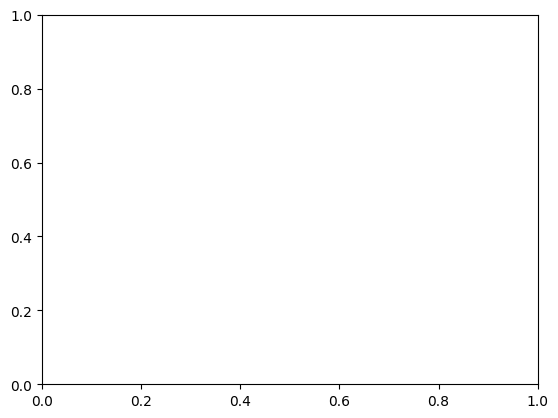

2024-09-16 21:00:05,073 - INFO - 


route



2024-09-16 21:00:05,077 - INFO - DATABASE
2024-09-16 21:00:05,077 - INFO - 

PLANNER:

{'module': 'DATABASE', 'steps': [{'llm': "base_url='https://integrate.api.nvidia.com/v1' model='meta/llama3-8b-instruct'", 'memory': 'None', 'prompt': "input_variables=['history', 'input'] template='Current conversation:\\n{history}\\n    \\nGENEONTOLOGY: The Gene Ontology (GO) is an initiative to unify the representation of gene and gene product attributes across all species via the aims: 1) maintain and develop its controlled vocabulary of gene and gene product attributes; 2) annotate genes and gene products, and assimilate and disseminate annotation data; and 3) provide tools for easy access to all aspects of the data provided by the project, and to enable functional interpretation of experimental data using the GO.\\n    \\nENRICHR: is a tool used to lookup sets of genes and their functional association. ENRICHR has access to many gene-set libraries in

BRAD >> 4: 


> Entering new ConversationChain chain...
Prompt after formatting:
Current conversation: Human: Context: You are BRAD (Bioinformatic Retrieval Augmented Data), a chatbot specializing in biology,
bioinformatics, genetics, and data science. You can be connected to a text database to augment your answers
based on the literature with Retrieval Augmented Generation, or you can use several additional modules including
searching the web for new articles, searching Gene Ontology or Enrichr bioinformatics databases, running snakemake
and matlab pipelines, or analyzing your own codes. Please answer the following questions to the best of your
ability.

Prompt: Who are you and what can you do?
BRAD: Hello! I'm BRAD, a chatbot specialized in biology, bioinformatics, genetics, and data science. My primary function is to assist and provide information on these fields, leveraging my connection to a vast text database of biological literature.

Using Retrieval Augmented Generation, I can 

2024-09-16 21:00:56,155 - INFO - 


route



2024-09-16 21:00:56,155 - INFO - RAG
2024-09-16 21:00:56,155 - INFO - 

PLANNER:

{'module': 'RAG', 'steps': [{'llm': "base_url='https://integrate.api.nvidia.com/v1' model='meta/llama3-8b-instruct'", 'memory': 'None', 'prompt': "input_variables=['history', 'input'] template='Current conversation: {history}\\n\\n\\nNew Input: \\n{input}'", 'input': 'Context: You are BRAD (Bioinformatic Retrieval Augmented Data), a chatbot specializing in biology,\nbioinformatics, genetics, and data science. You can be connected to a text database to augment your answers\nbased on the literature with Retrieval Augmented Generation, or you can use several additional modules including\nsearching the web for new articles, searching Gene Ontology or Enrichr bioinformatics databases, running snakemake\nand matlab pipelines, or analyzing your own codes. Please answer the following questions to the best of your\nability.\n\nPrompt: now what', 'output': "It seems like


> Finished chain.
It seems like we've just finished exploring the Enrichr search results for MYOD and related genes. As a result, you now have a list of co-expressed, interacted, and functionally related genes that may be relevant to your research or analysis.

As for what's next, I'd be happy to help with any of the following:

1. **Gene Ontology (GO) analysis**: I can help you identify the biological processes, cellular components, and molecular functions that are enriched among the co-expressed genes.
2. **Pathway analysis**: I can assist you in identifying the signaling pathways, gene networks, or biological pathways that are associated with the co-expressed genes.
3. **Gene set enrichment analysis**: I can help you generate a list of curated gene sets or functional annotations related to MYOD and the co-expressed genes.
4. **Data visualization**: I can help you visualize the relationships between the co-expressed genes using network diagrams or other visualization tools.
5. **Dat

In [19]:
import tkinter as tk
from tkinter import scrolledtext

class ChatBotGUI:
    def __init__(self, master, bot):
        self.master = master
        master.title("BRAD Chatbot")
        
        # Initialize chatbot instance
        self.bot = bot
        
        # Chat display area (scrollable text)
        self.chat_display = scrolledtext.ScrolledText(master, wrap=tk.WORD, state='disabled', height=20, width=80)
        self.chat_display.grid(row=0, column=0, columnspan=2, padx=10, pady=10)
        
        # User input area
        self.user_input = tk.Entry(master, width=70)
        self.user_input.grid(row=1, column=0, padx=10, pady=10)
        self.user_input.bind("<Return>", self.send_message)  # Bind Enter key to send message
        
        # Send button
        self.send_button = tk.Button(master, text="Send", command=self.send_message)
        self.send_button.grid(row=1, column=1, padx=10, pady=10)

    def send_message(self, event=None):
        """Send user message to the chatbot and display the response."""
        user_message = self.user_input.get().strip()
        if user_message:
            # Display user message in chat window
            self._insert_message(f'You: {user_message}\n')

            # Clear input field
            self.user_input.delete(0, tk.END)

            # Send message to chatbot and get response
            response = self.bot.invoke(user_message)
            if not response:
                response_text = "Goodbye!"
            else:
                response_text = self.bot.chatstatus['output']

            # Display chatbot's response
            self._insert_message(f'BRAD: {response_text}\n')

    def _insert_message(self, message):
        """Inserts a message into the chat display area."""
        self.chat_display.config(state='normal')  # Enable editing of chat display
        self.chat_display.insert(tk.END, message)
        self.chat_display.yview(tk.END)  # Auto-scroll to the bottom
        self.chat_display.config(state='disabled')  # Disable editing of chat display

# Create main window
root = tk.Tk()
chatbot_gui = ChatBotGUI(root, bot=bot)

# Start the GUI event loop
root.mainloop()
